<a href="https://colab.research.google.com/github/Grimound/Age/blob/main/SmallDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.83


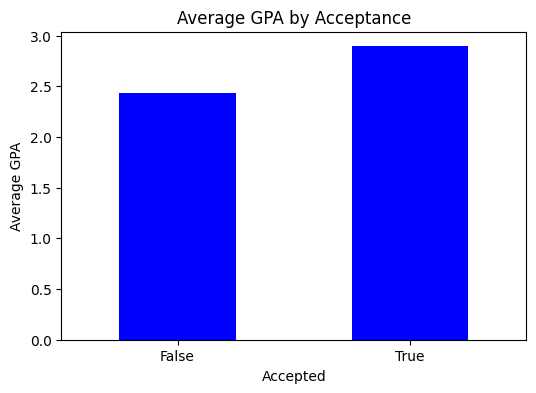

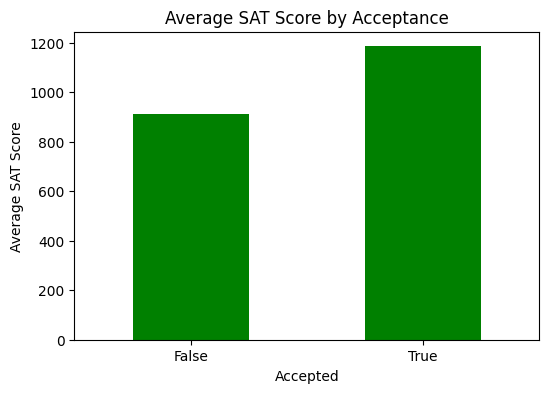

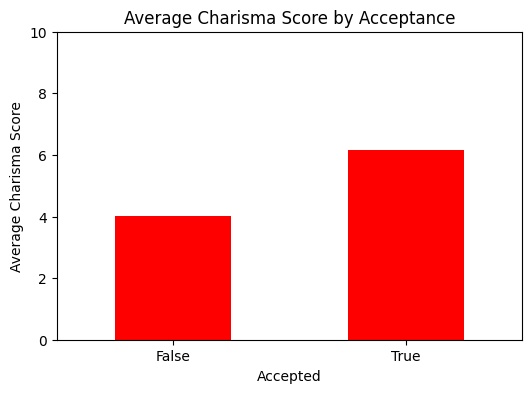

Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.67      0.70      1051
        True       0.87      0.90      0.89      2549

    accuracy                           0.83      3600
   macro avg       0.80      0.79      0.79      3600
weighted avg       0.83      0.83      0.83      3600

Predicted Acceptance: Accepted


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('https://raw.githubusercontent.com/Grimound/Age/refs/heads/main/Acceptance.csv')
X = df[['GPA', 'SAT Score', 'Charisma Score']]
y = df['Accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

feature_means = df.groupby('Accepted')[['GPA', 'SAT Score', 'Charisma Score']].mean()
#GPA graph
plt.figure(figsize=(6, 4))
feature_means['GPA'].plot(kind='bar', color='blue')
plt.title('Average GPA by Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.show()

#SAT Graph
plt.figure(figsize=(6, 4))
feature_means['SAT Score'].plot(kind='bar', color='green')
plt.title('Average SAT Score by Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Average SAT Score')
plt.xticks(rotation=0)
plt.show()

#Charisma Graph
plt.figure(figsize=(6, 4))
feature_means['Charisma Score'].plot(kind='bar', color='red')
plt.title('Average Charisma Score by Acceptance')
plt.xlabel('Accepted')
plt.ylabel('Average Charisma Score')
plt.xticks(rotation=0)
plt.ylim(0, 10)
plt.show()
print('Classification Report:\n', classification_report(y_test, y_pred))

#Test
sample_data = [[3.5, 1250, 7]]
prediction = model.predict(sample_data)
print('Predicted Acceptance:', 'Accepted' if prediction[0] else 'Rejected')
